# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [4]:
%pip install --upgrade plotly

### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.duplicated().values.any()

False

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [ ]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [8]:
clean_df_data = df_data.fillna(0)

In [9]:
clean_df_data.isna().values.any()

False

In [10]:
clean_df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
clean_df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [ ]:
clean_df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0,Success
freq,1777,235,2,6,3534,3360,3879


In [ ]:
clean_df_data.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
Country           object
dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
mission_count = clean_df_data['Organisation'].value_counts()
mission_count

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [ ]:
mission_count = pd.DataFrame({'Organisation':mission_count.index,
                                'count':mission_count.values})

In [ ]:
mission_count

,Organisation,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


Text(0, 0.5, 'Count')

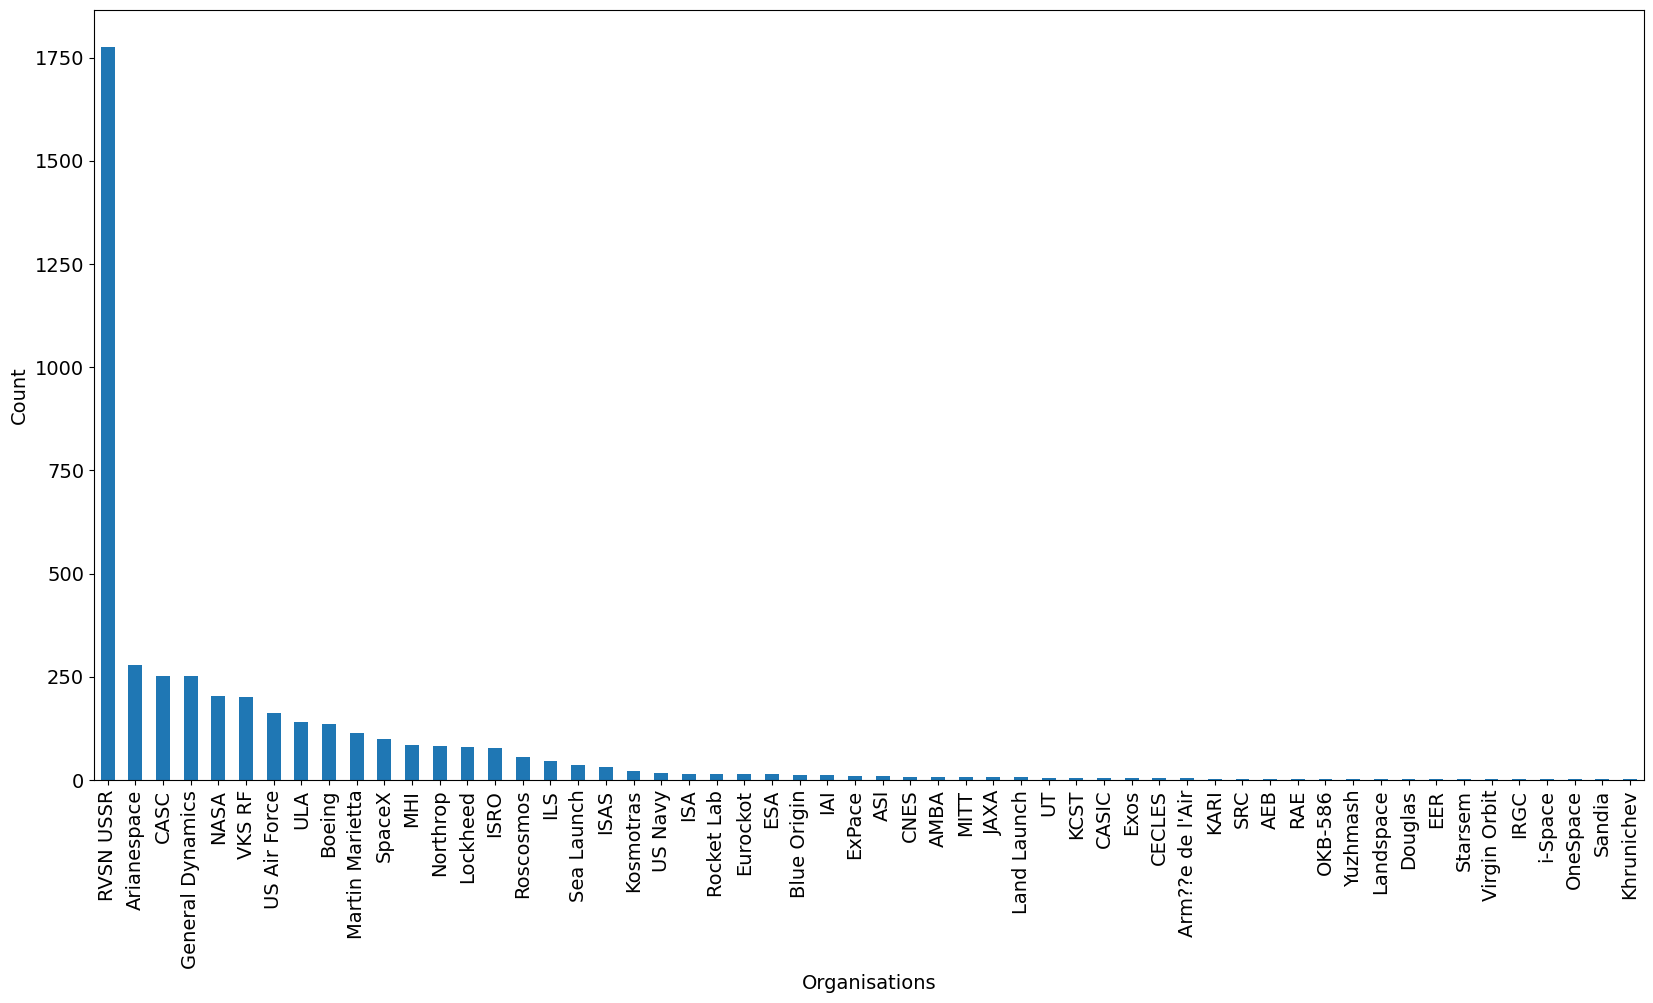

In [ ]:
clean_df_data['Organisation'].value_counts().plot.bar(figsize=(20,10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Organisations",fontsize=14)
plt.ylabel("Count", fontsize=14)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
clean_df_data[['Organisation', 'Rocket_Status']].groupby('Rocket_Status').count()

,Organisation
Rocket_Status,
StatusActive,790
StatusRetired,3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
clean_df_data[['Organisation', 'Mission_Status']].groupby('Mission_Status').count()

,Organisation
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
prices=clean_df_data[['Price', 'Organisation']].groupby('Price').count()
prices

,Organisation
Price,
0,3360
"1,160.0",13
109.0,37
112.5,9
115.0,6
12.0,1
120.0,7
123.0,8
130.0,3


In [ ]:
prices.ndim

2

In [ ]:
hist = px.histogram(clean_df_data,
                    x="Price")
hist.update_layout(xaxis_title='Price of the Launches in USD millions',
                   yaxis_title='Count')
hist.show()

In [ ]:
drop_data = clean_df_data[clean_df_data['Price'] == 0].index
histo_data = clean_df_data.drop(drop_data)
histo_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [ ]:
price_new = histo_data[['Price', 'Organisation']].groupby('Price').count()
price_new

,Organisation
Price,
"1,160.0",13
109.0,37
112.5,9
115.0,6
12.0,1
120.0,7
123.0,8
130.0,3
133.0,3


In [ ]:
histo = px.histogram(histo_data,
                    x="Price")
histo.update_layout(xaxis_title='Price of the Launches in USD millions',
                   yaxis_title='Count')
histo.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [11]:
clean_df_data['Country'] = clean_df_data.Location.str.split(',').str[-1]
clean_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success,Kazakhstan


In [12]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Russia", "Russian Federation")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("New Mexico", "USA")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Yellow Sea", "China")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Shahrud Missile Test Site", "Iran")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Pacific Missile Range Facility", "USA")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Barents Sea", "Russian Federation")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Gran Canaria", "USA")

In [13]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Iran", "Iran, Islamic Republic of")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("North Korea", "Korea, Democratic People's Republic of")
clean_df_data['Country'] = clean_df_data['Country'].str.replace("South Korea", "Korea, Republic of")

In [14]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' Pacific Ocean', 'Kiribati')

In [15]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" USA", "USA")
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" China", "China")
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" Japan", "Japan")
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" Brazil", "Brazil")

In [16]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' Kazakhstan', 'Kazakhstan')

In [17]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' Israel', 'Israel')

In [18]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' New Zealand', 'New Zealand')

In [19]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' Russian Federation', 'Russian Federation')

In [20]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" Korea, Democratic People's Republic of", "Korea, Democratic People's Republic of")
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" Korea, Republic of", "Korea, Republic of")


In [21]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace("Iran, Islamic Republic of, Islamic Republic of", "Iran, Islamic Republic of")

In [22]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(" Iran, Islamic Republic of", "Iran, Islamic Republic of")

In [23]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' France', 'France')

In [24]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' India', 'India')

In [25]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' Kenya', 'Kenya')

In [26]:
clean_df_data['Country'] = clean_df_data['Country'].str.replace(' Australia', 'Australia')

In [ ]:
clean_df_data.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
Country           object
dtype: object

In [ ]:
country_list = clean_df_data['Country'].values.tolist()
result=[]
for i in range(len(country_list)):
  r = countries.get(country_list[i]).alpha3
  result.append(r)
clean_df_data['ISO'] = result

In [ ]:
clean_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success,Kazakhstan,KAZ


In [ ]:
country_launch_count = clean_df_data.ISO.value_counts()

In [ ]:
country_launch_count = pd.DataFrame({'ISO':country_launch_count.index,
                                'count':country_launch_count.values})

In [ ]:
countries = ["Russian Federation", "USA", "Kazakhstan", "France", "China", "Japan", "India", "Kiribati", "Iran", "New Zealand", "Israel", "Kenya", "Australia", "North Korea", "South Korea", "Brazil"]

In [ ]:
country_launch_count['Country'] = countries

In [ ]:
country_launch_count

,ISO,count,Country
0,RUS,1398,Russian Federation
1,USA,1351,USA
2,KAZ,701,Kazakhstan
3,FRA,303,France
4,CHN,269,China
5,JPN,126,Japan
6,IND,76,India
7,KIR,36,Kiribati
8,IRN,14,Iran
9,NZL,13,New Zealand


In [ ]:
world_map = px.choropleth(country_launch_count,
                          locations='ISO',
                          color='count',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
launch_failure = clean_df_data[(clean_df_data.Mission_Status == 'Failure') | (clean_df_data.Mission_Status =='Partial Failure') | (clean_df_data.Mission_Status =='Prelaunch Failure')]
launch_failure

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month,mon_name
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00+00:00,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,China,CHN,2020,7,July
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020-07-04 21:19:00+00:00,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,New Zealand,NZL,2020,7,July
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020-05-25 19:50:00+00:00,LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA,USA,2020,5,May
36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-04-09 11:46:00+00:00,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,CHN,2020,4,April
43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020-03-16 13:34:00+00:00,Long March 7A | XJY-6,StatusActive,0.00,Failure,China,CHN,2020,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00+00:00,Vanguard | Vanguard TV5,StatusRetired,0.00,Failure,USA,USA,1958,4,April
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,Kazakhstan,KAZ,1958,4,April
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,0.00,Failure,USA,USA,1958,3,March
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA,1958,2,February


In [ ]:
launch_failure_count = launch_failure.ISO.value_counts()
launch_failure_count

USA    163
KAZ     93
RUS     93
CHN     25
FRA     18
IND     13
JPN     13
IRN      9
KIR      3
PRK      3
BRA      3
AUS      3
NZL      2
KOR      2
ISR      2
Name: ISO, dtype: int64

In [ ]:
launch_failure_count = pd.DataFrame({'ISO':launch_failure_count.index,
                                'count':launch_failure_count.values})
launch_failure_count

,ISO,count
0,USA,163
1,KAZ,93
2,RUS,93
3,CHN,25
4,FRA,18
5,IND,13
6,JPN,13
7,IRN,9
8,KIR,3
9,PRK,3


In [ ]:
countries = ["USA", "Kazakhstan", "Russian Federation","China" ,"France" ,"India" ,"Japan" ,"Iran" ,"Kiribati","North Korea", "Brazil", "Australia", "New Zealand",  "South Korea",  "Israel"]
launch_failure_count['Country'] = countries
launch_failure_count

,ISO,count,Country
0,USA,163,USA
1,KAZ,93,Kazakhstan
2,RUS,93,Russian Federation
3,CHN,25,China
4,FRA,18,France
5,IND,13,India
6,JPN,13,Japan
7,IRN,9,Iran
8,KIR,3,Kiribati
9,PRK,3,North Korea


In [ ]:
launch_failure_map = px.choropleth(launch_failure_count,
                          locations='ISO',
                          color='count',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.matter)

launch_failure_map.update_layout(coloraxis_showscale=True,)

launch_failure_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
country_city_org = clean_df_data.groupby(by=['Country',
                                       'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})

country_city_org = country_city_org.sort_values('Mission_Status', ascending=False)
country_city_org

,Country,Organisation,Mission_Status
42,Russian Federation,RVSN USSR,1198
28,Kazakhstan,RVSN USSR,579
10,France,Arianespace,277
53,USA,General Dynamics,251
4,China,CASC,251
...,...,...,...
12,France,CECLES,1
9,China,i-Space,1
8,China,OneSpace,1
7,China,Landspace,1


In [ ]:
burst = px.sunburst(country_city_org,
                    path=['Country', 'Organisation'],
                    values='Mission_Status',
                    title='Where do Launches Take Place?',
                   )

burst.update_layout(xaxis_title='Number of lauches',
                    yaxis_title='Organisations',
                    coloraxis_showscale=False)

burst.show()

In [ ]:
country_city_org_ex = clean_df_data.groupby(by=['Country',
                                       'Organisation',
                                       'Location'], as_index=False).agg({'Mission_Status': pd.Series.count})

country_city_org_ex = country_city_org_ex.sort_values('Mission_Status', ascending=False)
country_city_org_ex

,Country,Organisation,Location,Mission_Status
69,Kazakhstan,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",212
111,Russian Federation,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",198
106,Russian Federation,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",174
60,Kazakhstan,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",174
113,Russian Federation,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",171
...,...,...,...,...
117,Russian Federation,SRC,"K-407 Submarine, Barents Sea Launch Area, Bare...",1
99,Russian Federation,Khrunichev,"Site 35/1, Plesetsk Cosmodrome, Russia",1
92,Kenya,ASI,"Santa Rita 2, San Marco Launch Platform, Kenya",1
90,Kazakhstan,Yuzhmash,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1


In [ ]:
burst_ex = px.sunburst(country_city_org_ex,
                    path=['Country', 'Organisation', 'Location'],
                    values='Mission_Status',
                    title='Where do Launches Take Place?',
                   )

burst_ex.update_layout(xaxis_title='Number of lauches',
                    yaxis_title='Organisations',
                    coloraxis_showscale=False)

burst_ex.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
clean_df_data.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
Country           object
ISO               object
dtype: object

In [ ]:
clean_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success,Kazakhstan,KAZ


In [ ]:
print(type(clean_df_data.Price[0]))

<class 'str'>


In [27]:
clean_df_data.Price = clean_df_data.Price.astype('str').str.replace(',', "")

In [28]:
clean_df_data.Price = pd.to_numeric(clean_df_data.Price)

In [ ]:
print(type(clean_df_data.Price[0]))

<class 'numpy.float64'>


In [ ]:
money_spent = clean_df_data.groupby('Organisation').agg({'Price': pd.Series.sum})
money_spent.sort_values('Price', ascending=False, inplace=True)

In [ ]:
money_spent

,Price
Organisation,
NASA,"76,280.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
RVSN USSR,"10,000.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money_spent_perlaunch = clean_df_data.groupby(by='Organisation').agg({'Price': pd.Series.mean})
money_spent_perlaunch.sort_values('Price', ascending=False, inplace=True)
money_spent_perlaunch

,Price
Organisation,
NASA,375.76
ULA,105.70
Arianespace,58.58
SpaceX,54.44
Northrop,47.35
MHI,42.05
Eurockot,41.80
Kosmotras,29.00
ILS,28.70


# Chart the Number of Launches per Year

In [ ]:
print(type(clean_df_data.Date[0]))

<class 'str'>


In [29]:
clean_df_data.Date = pd.to_datetime(clean_df_data.Date, utc=True)
clean_df_data['Year'] = clean_df_data.Date.dt.year
clean_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,1957


In [ ]:
print(type(clean_df_data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
launch_per_year = clean_df_data['Year'].value_counts()
launch_per_year

1971    119
2018    117
1977    114
1975    113
1976    113
       ... 
2010     37
2005     37
1958     28
1959     20
1957      3
Name: Year, Length: 64, dtype: int64

In [ ]:
launch_per_year = pd.DataFrame({'Year':launch_per_year.index,
                                'count':launch_per_year.values})
launch_per_year

,Year,count
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [ ]:
lpy_sort = launch_per_year.sort_values(by="Year",ascending=True)
lpy_sort

,Year,count
63,1957,3
61,1958,28
62,1959,20
57,1960,39
42,1961,52
...,...,...
16,2016,90
15,2017,92
1,2018,117
5,2019,109


Text(0, 0.5, 'Count')

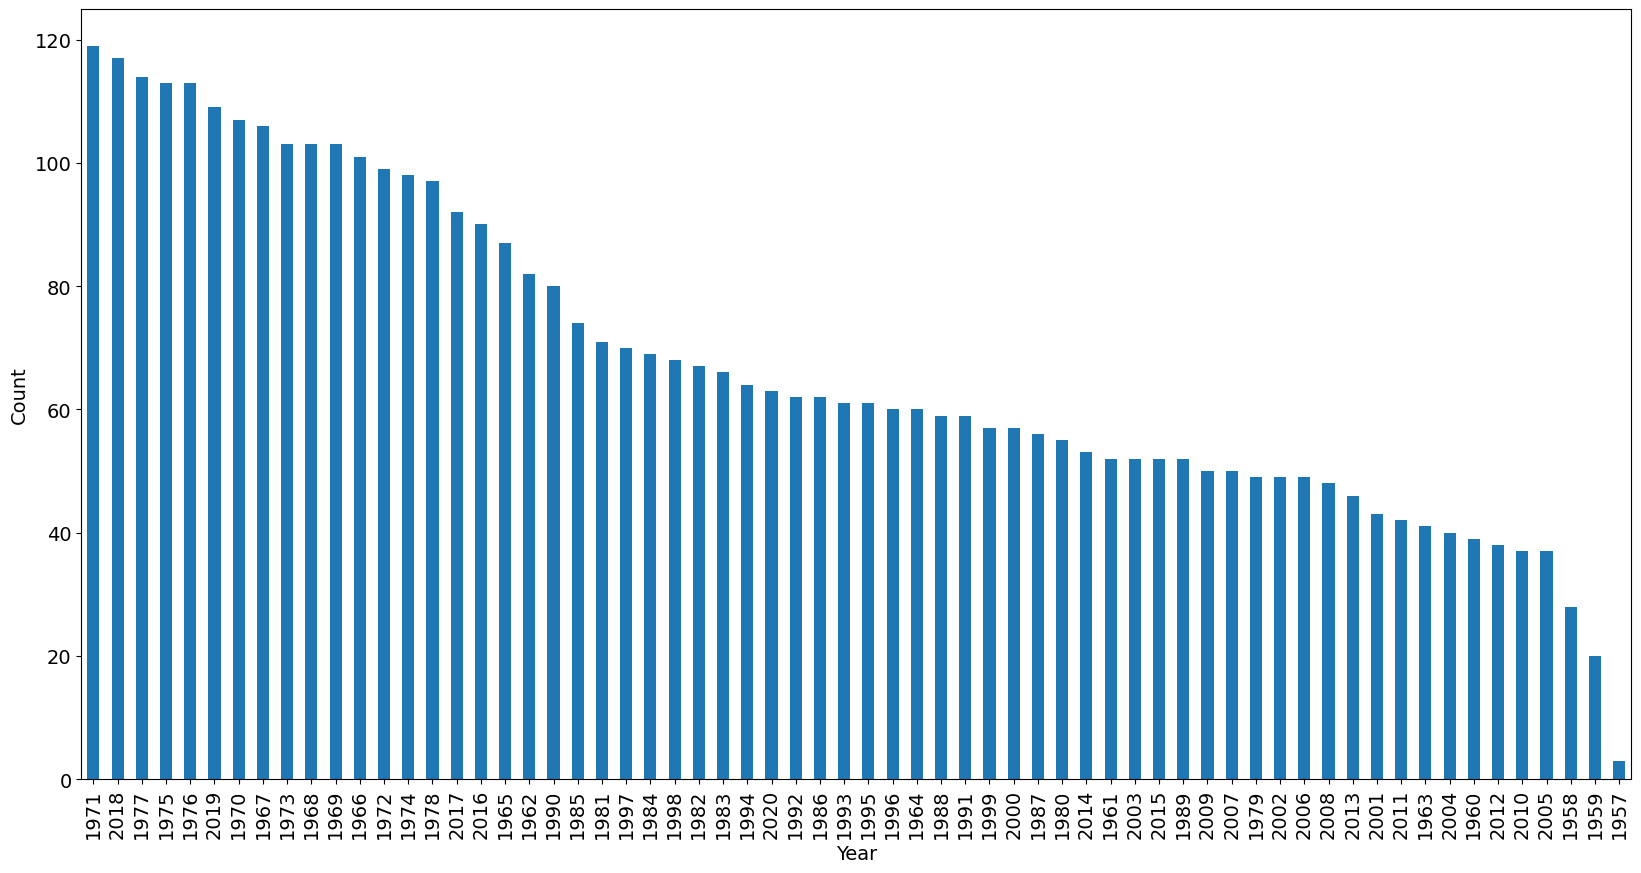

In [ ]:
clean_df_data['Year'].value_counts().plot.bar(figsize=(20,10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Count", fontsize=14)

In [ ]:
l_chart = px.line(lpy_sort,
                  x='Year',
                  y='count')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [30]:
clean_df_data["dates"] = clean_df_data['Date'].dt.date
clean_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,dates
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08-07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020-08-06
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020,2020-08-04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,2020-07-30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07-30
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,1958,1958-02-05
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,1958,1958-02-01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,1957,1957-12-06
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,1957,1957-11-03


In [65]:
launch_per_day = clean_df_data['dates'].value_counts()[clean_df_data.dates.unique()]
launch_per_day

2020-08-07    1
2020-08-06    1
2020-08-04    1
2020-07-30    2
2020-07-25    1
             ..
1958-02-05    1
1958-02-01    1
1957-12-06    1
1957-11-03    1
1957-10-04    1
Name: dates, Length: 3922, dtype: int64

In [74]:
moving_average = launch_per_day.rolling(window=30).mean()
moving_average

2020-08-07    NaN
2020-08-06    NaN
2020-08-04    NaN
2020-07-30    NaN
2020-07-25    NaN
             ... 
1958-02-05   1.03
1958-02-01   1.03
1957-12-06   1.03
1957-11-03   1.03
1957-10-04   1.03
Name: dates, Length: 3922, dtype: float64

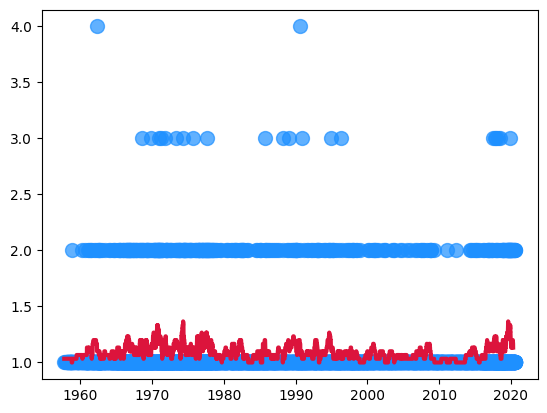

In [75]:
plt.scatter(x=launch_per_day.index,
           y=launch_per_day.values,
           c='dodgerblue',
           alpha=0.7,
           s=100)

plt.plot(launch_per_day.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [31]:
clean_df_data['Month'] = clean_df_data.Date.dt.month
clean_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,dates,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08-07,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020-08-06,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020,2020-08-04,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,2020-07-30,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07-30,7
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,1958,1958-02-05,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,1958,1958-02-01,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,1957,1957-12-06,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,1957,1957-11-03,11


In [32]:
clean_df_data['mon_name'] = clean_df_data.Date.dt.month_name()

In [60]:
launch_per_month = clean_df_data.groupby(by=['Month',
                                       'mon_name'], as_index=False).agg({'mon_name': pd.Series.count})

launch_per_month = launch_per_month.sort_values('Month')
launch_per_month

,Month,mon_name
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


In [61]:
launch_per_month['Month'] = launch_per_month['Month'].apply(lambda x: calendar.month_abbr[x])
launch_per_month

,Month,mon_name
0,Jan,268
1,Feb,336
2,Mar,353
3,Apr,383
4,May,326
5,Jun,402
6,Jul,351
7,Aug,373
8,Sep,365
9,Oct,381


In [63]:
v_bar = px.bar(
        x = launch_per_month.Month,
        y = launch_per_month.mon_name,
        color = launch_per_month.mon_name,
        color_continuous_scale='Aggrnyl',
        title='Number of Launches per month')

v_bar.update_layout(xaxis_title='Month',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launches')
v_bar.show()

In [ ]:
l_chart = px.line(launch_per_month,
                  x='Month',
                  y='mon_name')

l_chart.update_layout(xaxis_title='Month',
                      yaxis_title='Number of Launches')

l_chart.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
launch_price = clean_df_data.groupby(by='Year').agg({'Price': pd.Series.mean})
launch_price.sort_values('Year',inplace=True)
launch_price

,Price
Year,
1957,0.00
1958,0.00
1959,0.00
1960,0.00
1961,0.00
...,...
2016,56.50
2017,49.85
2018,48.70


<Axes: xlabel='Year'>

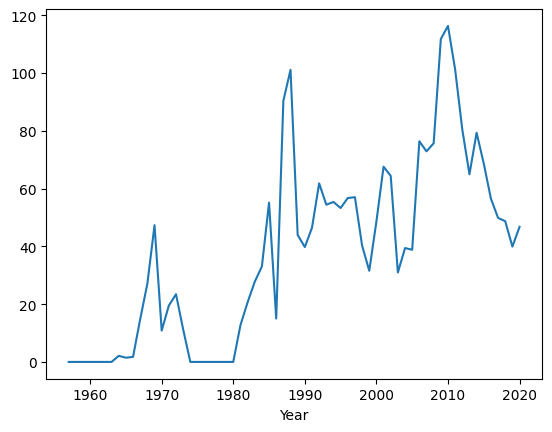

In [ ]:
clean_df_data.groupby(['Year'])['Price'].mean().plot()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
mission_count_10 = clean_df_data['Organisation'].value_counts()[:10]
mission_count_10

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

In [ ]:
mission_count_10 = pd.DataFrame({'Organisation':mission_count_10.index,
                                'count':mission_count_10.values})
mission_count_10

,Organisation,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [ ]:
df_subset = clean_df_data[clean_df_data.set_index(['Organisation']).index.isin(mission_count_10.set_index(['Organisation']).index)]
df_subset

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month,mon_name
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8,August
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7,July
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,2020,7,July
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,0.00,Success,China,CHN,2020,7,July
12,CASC,"LC-3, Xichang Satellite Launch Center, China",2020-07-09 12:11:00+00:00,Long March 3B/E | Apstar-6D,StatusActive,29.15,Success,China,CHN,2020,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA",1958-08-17 12:18:00+00:00,Thor-DM 18 Able I | Pioneer 0,StatusRetired,0.00,Failure,USA,USA,1958,8,August
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,0.00,Success,Kazakhstan,KAZ,1958,5,May
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,Kazakhstan,KAZ,1958,4,April
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,KAZ,1957,11,November


In [ ]:
launch_by_year = df_subset.groupby(by=['Organisation', 'Year'], as_index=False).count()
launch_by_year = launch_by_year.sort_values('Year')[['Year', 'Organisation', 'Mission_Status']]
launch_by_year

,Year,Organisation,Mission_Status
215,1957,RVSN USSR,2
216,1958,RVSN USSR,5
169,1958,NASA,2
269,1958,US Air Force,2
217,1959,RVSN USSR,4
...,...,...,...
321,2019,VKS RF,8
36,2020,Arianespace,4
268,2020,ULA,4
101,2020,CASC,19


In [ ]:
cumulative_launch = launch_by_year.groupby(by=['Organisation',
                                              'Year']).sum().groupby(level=[0]).cumsum()
cumulative_launch.reset_index(inplace=True)
cumulative_launch

,Organisation,Year,Mission_Status
0,Arianespace,1984,3
1,Arianespace,1985,7
2,Arianespace,1986,10
3,Arianespace,1987,12
4,Arianespace,1988,18
...,...,...,...
318,VKS RF,2016,179
319,VKS RF,2017,185
320,VKS RF,2018,190
321,VKS RF,2019,198


In [ ]:
cumulative_launch.rename(columns = {'Mission_Status':'Count'}, inplace = True)

In [ ]:
l_chart = px.line(cumulative_launch,
                  x='Year',
                  y='Count',
                  color='Organisation',
                  hover_name='Organisation')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
country_count =  clean_df_data.groupby(by=['Country',
                                       'Organisation', 'Year'], as_index=False).agg({'ISO': pd.Series.count})

country_count = country_count.sort_values('ISO', ascending=False)
country_count_sp = country_count[(country_count.Country == 'Russian Federation') | (country_count.Country == 'USA') | (country_count.Country == 'Kazakhstan')]
country_count_sp.rename(columns = {'ISO':'Count'}, inplace = True)
country_count_sp

In [ ]:
cold_war = country_count_sp[(country_count_sp['Year'] >= 1957) & (country_count_sp['Year'] <= 1991)]
cold_war

,Country,Organisation,Year,Count
414,Russian Federation,RVSN USSR,1977,72
410,Russian Federation,RVSN USSR,1973,67
413,Russian Federation,RVSN USSR,1976,66
412,Russian Federation,RVSN USSR,1975,66
415,Russian Federation,RVSN USSR,1978,62
...,...,...,...,...
469,Russian Federation,Yuzhmash,1991,1
339,Kazakhstan,Yuzhmash,1969,1
310,Kazakhstan,Roscosmos,1970,1
273,Kazakhstan,OKB-586,1968,1


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
superpowers_count = country_launch_count[:3]
superpowers_count

,ISO,count,Country
0,RUS,1398,Russian Federation
1,USA,1351,USA
2,KAZ,701,Kazakhstan


In [ ]:
fig = px.pie(superpowers_count, labels='Country', values='count', title='Launches by USSR and USA', names='Country')
fig.update_traces(textposition='inside')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
country_count_sp = country_count_sp.sort_values('Year')

In [ ]:
cumulative_launch_sp = country_count_sp.groupby(by=['Country', 'Organisation',
                                              'Year']).sum().groupby(level=[0]).cumsum()
cumulative_launch.sort_values('Year')[['Organisation','Year', 'Count']]
cumulative_launch_sp.reset_index(inplace=True)
cumulative_launch_sp

,Country,Organisation,Year,Count
0,Kazakhstan,Arianespace,2020,2
1,Kazakhstan,ILS,1997,3
2,Kazakhstan,ILS,2016,5
3,Kazakhstan,ILS,2017,7
4,Kazakhstan,ILS,2019,8
...,...,...,...,...
434,USA,US Air Force,1984,1333
435,USA,US Navy,1957,1334
436,USA,US Navy,1958,1346
437,USA,US Navy,1959,1350


In [ ]:
l_chart = px.line(country_count_sp,
                  x='Year',
                  y='Count',
                  color='Country',
                  hover_name='Country')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
launch_failure_sp = launch_failure_count[:3]
launch_failure_sp

,ISO,count,Country
0,USA,163,USA
1,KAZ,93,Kazakhstan
2,RUS,93,Russian Federation


In [ ]:
launch_failure

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month,mon_name
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00+00:00,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,China,CHN,2020,7,July
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020-07-04 21:19:00+00:00,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,New Zealand,NZL,2020,7,July
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020-05-25 19:50:00+00:00,LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA,USA,2020,5,May
36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-04-09 11:46:00+00:00,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,CHN,2020,4,April
43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020-03-16 13:34:00+00:00,Long March 7A | XJY-6,StatusActive,0.00,Failure,China,CHN,2020,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00+00:00,Vanguard | Vanguard TV5,StatusRetired,0.00,Failure,USA,USA,1958,4,April
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,Kazakhstan,KAZ,1958,4,April
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,0.00,Failure,USA,USA,1958,3,March
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA,1958,2,February


In [ ]:
fail_sp = launch_failure[(launch_failure.Country == 'USA') | (launch_failure.Country == 'Kazakhstan') | (launch_failure.Country == 'Russian Federation') ]
fail_sp = fail_sp.sort_values('Year')
fail_sp

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month,mon_name
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,USA,1957,12,December
4294,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-12-06 05:44:00+00:00,Juno II | Pioneer 3,StatusRetired,0.00,Partial Failure,USA,USA,1958,12,December
4295,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-12-04 18:18:00+00:00,Vostok | E-1 n†­3 (Luna-1),StatusRetired,0.00,Failure,Kazakhstan,KAZ,1958,12,December
4296,NASA,"SLC-17A, Cape Canaveral AFS, Florida, USA",1958-11-08 07:30:00+00:00,Thor-DM 18 Able I | Pioneer 2,StatusRetired,0.00,Failure,USA,USA,1958,11,November
4297,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-10-23 03:21:00+00:00,Juno I | Beacon 1,StatusRetired,0.00,Failure,USA,USA,1958,10,October
...,...,...,...,...,...,...,...,...,...,...,...,...
208,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2018-10-11 08:40:00+00:00,Soyuz FG | Soyuz MS-10 (56S),StatusRetired,0.00,Failure,Kazakhstan,KAZ,2018,10,October
157,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-03-02 17:45:00+00:00,SARGE | Launch 2,StatusActive,0.00,Partial Failure,USA,USA,2019,3,March
127,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-06-29 18:00:00+00:00,SARGE | Launch 3,StatusActive,0.00,Partial Failure,USA,USA,2019,6,June
91,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-10-26 17:40:00+00:00,SARGE | Launch 4,StatusActive,0.00,Failure,USA,USA,2019,10,October


In [ ]:
sp_fail = fail_sp.groupby(by=['Organisation', 'Year', 'Country'], as_index=False).count()
sp_fail = sp_fail.sort_values('Year')[['Year', 'Organisation','Country', 'Mission_Status']]
sp_fail

,Year,Organisation,Country,Mission_Status
144,1957,US Navy,USA,1
0,1958,AMBA,USA,4
68,1958,RVSN USSR,Kazakhstan,4
50,1958,NASA,USA,2
134,1958,US Air Force,USA,1
...,...,...,...,...
122,2017,Roscosmos,Kazakhstan,1
124,2018,Roscosmos,Kazakhstan,1
8,2018,Exos,USA,1
9,2019,Exos,USA,3


In [ ]:
fail_chart = fail_sp.groupby(by=['Year', 'Country'], as_index=False).count()
fail_chart = fail_chart.sort_values('Year')[['Year','Country', 'Mission_Status']]
fail_chart

,Year,Country,Mission_Status
0,1957,USA,1
1,1958,Kazakhstan,4
2,1958,USA,18
3,1959,Kazakhstan,2
4,1959,USA,10
...,...,...,...
118,2017,Russian Federation,1
119,2018,Kazakhstan,1
120,2018,USA,1
121,2019,USA,3


In [ ]:
l_chart = px.line(fail_chart,
                  x='Year',
                  y='Mission_Status',
                  color='Country',
                  hover_name='Country')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of failed Launches')

l_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
fail_pct = fail_sp.groupby(by=['Year', 'Country'], as_index=False).count()
fail_pct = fail_pct.sort_values('Year')[['Year','Country', 'Mission_Status']]
fail_pct

,Year,Country,Mission_Status
0,1957,USA,1
1,1958,Kazakhstan,4
2,1958,USA,18
3,1959,Kazakhstan,2
4,1959,USA,10
...,...,...,...
118,2017,Russian Federation,1
119,2018,Kazakhstan,1
120,2018,USA,1
121,2019,USA,3


In [ ]:
us = fail_pct[fail_pct.Country == 'USA']
us

,Year,Country,Mission_Status
0,1957,USA,1
2,1958,USA,18
4,1959,USA,10
6,1960,USA,14
9,1961,USA,16
12,1962,USA,10
15,1963,USA,4
18,1964,USA,5
21,1965,USA,7
24,1966,USA,7


In [ ]:
us['growth'] = us['Mission_Status'].pct_change()
us = us.dropna()
us

,Year,Country,Mission_Status,growth
2,1958,USA,18,17.00
4,1959,USA,10,-0.44
6,1960,USA,14,0.40
9,1961,USA,16,0.14
12,1962,USA,10,-0.38
15,1963,USA,4,-0.60
18,1964,USA,5,0.25
21,1965,USA,7,0.40
24,1966,USA,7,0.00
27,1967,USA,5,-0.29


In [ ]:
us_chart = px.line(us,
                  x='Year',
                  y='growth')

us_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

us_chart.show()

In [ ]:
rus = fail_pct[fail_pct.Country == 'Russian Federation']
rus['growth'] = rus['Mission_Status'].pct_change()
rus = rus.dropna()
rus

<ipython-input-119-3f40ef6a1d8a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Country,Mission_Status,growth
11,1962,Russian Federation,1,-0.50
14,1963,Russian Federation,4,3.00
17,1964,Russian Federation,1,-0.75
20,1965,Russian Federation,3,2.00
23,1966,Russian Federation,2,-0.33
26,1967,Russian Federation,4,1.00
29,1968,Russian Federation,3,-0.25
32,1969,Russian Federation,5,0.67
34,1970,Russian Federation,7,0.40
37,1971,Russian Federation,8,0.14


In [ ]:
kaz = fail_pct[fail_pct.Country == 'Kazakhstan']
kaz['growth'] = kaz['Mission_Status'].pct_change()
kaz = kaz.dropna()
kaz

<ipython-input-126-b3a67f7b69ef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Country,Mission_Status,growth
3,1959,Kazakhstan,2,-0.50
5,1960,Kazakhstan,6,2.00
7,1961,Kazakhstan,2,-0.67
10,1962,Kazakhstan,6,2.00
13,1963,Kazakhstan,4,-0.33
16,1964,Kazakhstan,6,0.50
19,1965,Kazakhstan,3,-0.50
22,1966,Kazakhstan,9,2.00
25,1967,Kazakhstan,8,-0.11
28,1968,Kazakhstan,5,-0.38


In [ ]:
merged = us.append(rus, ignore_index=True)
merged1 = merged.append(kaz, ignore_index=True)
merged1

<ipython-input-131-849736f81de2>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-131-849736f81de2>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Year,Country,Mission_Status,growth
0,1958,USA,18,17.00
1,1959,USA,10,-0.44
2,1960,USA,14,0.40
3,1961,USA,16,0.14
4,1962,USA,10,-0.38
...,...,...,...,...
115,2008,Kazakhstan,1,0.00
116,2013,Kazakhstan,1,0.00
117,2016,Kazakhstan,1,0.00
118,2017,Kazakhstan,1,0.00


In [ ]:
merged_chart = px.line(merged1,
                  x='Year',
                  y='growth',
                  color='Country',
                  hover_name='Country')

merged_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Percentage of Failures over time')

merged_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [33]:
col_subset = ['Mission_Status', 'Country', 'Year']
year = clean_df_data.sort_values('Year')
year[col_subset]

,Mission_Status,Country,Year
4323,Success,Kazakhstan,1957
4322,Success,Kazakhstan,1957
4321,Failure,USA,1957
4320,Success,USA,1958
4293,Success,USA,1958
...,...,...,...
35,Success,"Iran, Islamic Republic of",2020
34,Success,USA,2020
33,Success,Kazakhstan,2020
31,Success,China,2020


In [34]:
grouped = year.groupby(['Year', 'Country']).size().reset_index(name='count')
grouped

,Year,Country,count
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4
...,...,...,...
422,2020,Japan,3
423,2020,Kazakhstan,6
424,2020,New Zealand,3
425,2020,Russian Federation,3


In [35]:
max_missions = grouped.groupby('Year')['count'].idxmax()
max_countries = grouped.loc[max_missions, ['Year', 'Country', 'count']]
max_countries

,Year,Country,count
0,1957,Kazakhstan,2
3,1958,USA,23
5,1959,USA,16
7,1960,USA,30
10,1961,USA,43
...,...,...,...
391,2016,USA,27
400,2017,USA,30
401,2018,China,39
409,2019,China,34


In [46]:
fig = px.bar(max_countries, x='Year', y='count',
             color='count', color_continuous_scale='Aggrnyl',
             labels={'Year': 'Year', 'count': 'Country Count with Maximum Missions', 'Country':'Country'})

fig.update_layout(title='Country with Maximum Missions by Year',
                  coloraxis_showscale=False,
                  xaxis_title='Year',
                  yaxis_title='Country Count with Maximum Missions')
fig.update_layout(annotations=[
    dict(x=Year, y=count/2, text=Country, xanchor='center', yanchor='middle', showarrow=False, textangle=-90)
    for Year, count, Country in max_countries[['Year', 'count', 'Country']].itertuples(index=False)
])


fig.show()

In [36]:
successful_years = year[year.Mission_Status == 'Success']
successful_years[col_subset]

,Mission_Status,Country,Year
4323,Success,Kazakhstan,1957
4322,Success,Kazakhstan,1957
4320,Success,USA,1958
4293,Success,USA,1958
4316,Success,USA,1958
...,...,...,...
35,Success,"Iran, Islamic Republic of",2020
34,Success,USA,2020
33,Success,Kazakhstan,2020
31,Success,China,2020


In [37]:
grouped_s = successful_years.groupby(['Year', 'Country']).size().reset_index(name='count')
grouped_s

,Year,Country,count
0,1957,Kazakhstan,2
1,1958,Kazakhstan,1
2,1958,USA,5
3,1959,Kazakhstan,2
4,1959,USA,6
...,...,...,...
381,2020,Japan,3
382,2020,Kazakhstan,6
383,2020,New Zealand,2
384,2020,Russian Federation,3


In [38]:
max_missions_s = grouped_s.groupby('Year')['count'].idxmax()
max_countries_s = grouped_s.loc[max_missions_s, ['Year', 'Country', 'count']]
max_countries_s

,Year,Country,count
0,1957,Kazakhstan,2
2,1958,USA,5
4,1959,USA,6
6,1960,USA,16
8,1961,USA,27
...,...,...,...
353,2016,USA,26
360,2017,USA,30
361,2018,China,38
369,2019,China,32


In [47]:
fig = px.bar(max_countries_s, x='Year', y='count',
             color='count', color_continuous_scale='Aggrnyl',
             labels={'Year': 'Year', 'count': 'Count of Successful Missions', 'Country':'Country'})

fig.update_layout(title='Country with Maximum Successful Missions by Year',
                  coloraxis_showscale=False,
                  xaxis_title='Year',
                  yaxis_title='Country Count with Maximum Missions')
fig.update_layout(annotations=[
    dict(x=Year, y=count/2, text=Country, xanchor='center', yanchor='middle', showarrow=False, textangle=-90)
    for Year, count, Country in max_countries[['Year', 'count', 'Country']].itertuples(index=False)
])


fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [48]:
col_subsets = ['Mission_Status','Organisation', 'Country', 'Year']
years = clean_df_data.sort_values('Year')
years[col_subsets]

,Mission_Status,Organisation,Country,Year
4323,Success,RVSN USSR,Kazakhstan,1957
4322,Success,RVSN USSR,Kazakhstan,1957
4321,Failure,US Navy,USA,1957
4320,Success,AMBA,USA,1958
4293,Success,US Air Force,USA,1958
...,...,...,...,...
35,Success,IRGC,"Iran, Islamic Republic of",2020
34,Success,SpaceX,USA,2020
33,Success,Roscosmos,Kazakhstan,2020
31,Success,ExPace,China,2020


In [49]:
grouped_o = years.groupby(['Year', 'Organisation']).size().reset_index(name='count')
grouped_o

,Year,Organisation,count
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [50]:
max_missions_o = grouped_o.groupby('Year')['count'].idxmax()
max_countries_o = grouped_o.loc[max_missions_o, ['Year', 'Organisation', 'count']]
max_countries_o

,Year,Organisation,count
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23
...,...,...,...
583,2016,CASC,22
611,2017,SpaceX,18
616,2018,CASC,37
632,2019,CASC,27


In [58]:
fig = px.bar(max_countries_s, x='Year', y='count',
             color='count', color_continuous_scale='Aggrnyl',
             labels={'Year': 'Year', 'count': 'Count'})

fig.update_layout(title='Organisation with Maximum Missions by Year',
                  coloraxis_showscale=False,
                  xaxis_title='Year',
                  yaxis_title='Organisation Count with Maximum Missions')
fig.update_layout(annotations=[
    dict(x=Year, y=count/2, text=Organisation, xanchor='center', yanchor='middle', showarrow=False, textangle=-90, font=dict(size=12))
    for Year, count, Organisation in max_countries_o[['Year', 'count', 'Organisation']].itertuples(index=False)
])


fig.show()